In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from pathlib import Path

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
des = description.loc[description['Table']=="application_{train|test}.csv", "Row":"Special"]

### metrische Daten

In [5]:
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [6]:
df = app_train[["SK_ID_CURR", "TARGET"] + m_heads]

In [7]:
skip = "SK_ID_CURR"

In [8]:
result = {
          "header":[],
          "rate":[],
          "des":[]
         }
for key in df.keys():
    if key in skip:
        continue
    rate = df[key].isnull().sum() / len(df[key]) * 100
    if rate > 60:
        result["header"].append(key)
        result["rate"].append(rate)
        result["des"].append(des[des["Row"] == key]["Description"])

result = pd.DataFrame(result)
result

,header,rate,des
0,OWN_CAR_AGE,65.990810,"24 Age of client's car Name: Description, dtype: object"
1,YEARS_BUILD_AVG,66.497784,"50 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
2,COMMONAREA_AVG,69.872297,"51 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
3,FLOORSMIN_AVG,67.848630,"55 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
4,LIVINGAPARTMENTS_AVG,68.354953,"57 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
5,NONLIVINGAPARTMENTS_AVG,69.432963,"59 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
6,YEARS_BUILD_MODE,66.497784,"64 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
7,COMMONAREA_MODE,69.872297,"65 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
8,FLOORSMIN_MODE,67.848630,"69 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"
9,LIVINGAPARTMENTS_MODE,68.354953,"71 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor Name: Description, dtype: object"


In [9]:
list(result.header)

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI']

In [10]:
m_heads = [head for head in m_heads if head not in list(result.header)]
df[m_heads].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,9,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,17,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,11,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
c = df[m_heads].corr() * 100

In [12]:
families = []
for i, row in c.iterrows():
    r = row[row > 70]
    if len(r) > 1 and set(r.index) not in families:
        print(r)
        print("\n")
        
        families.append(set(r.index))

CNT_CHILDREN       100.000000
CNT_FAM_MEMBERS     87.916064
Name: CNT_CHILDREN, dtype: float64


AMT_CREDIT         100.000000
AMT_ANNUITY         77.013800
AMT_GOODS_PRICE     98.696831
Name: AMT_CREDIT, dtype: float64


APARTMENTS_AVG     100.000000
ELEVATORS_AVG       83.695804
LIVINGAREA_AVG      91.361876
APARTMENTS_MODE     97.325946
ELEVATORS_MODE      82.255328
LIVINGAREA_MODE     89.346312
APARTMENTS_MEDI     99.508082
ELEVATORS_MEDI      83.512267
LIVINGAREA_MEDI     91.232957
TOTALAREA_MODE      89.262693
Name: APARTMENTS_AVG, dtype: float64


BASEMENTAREA_AVG     100.000000
BASEMENTAREA_MODE     97.349578
BASEMENTAREA_MEDI     99.431734
Name: BASEMENTAREA_AVG, dtype: float64


YEARS_BEGINEXPLUATATION_AVG     100.000000
YEARS_BEGINEXPLUATATION_MODE     97.189337
YEARS_BEGINEXPLUATATION_MEDI     99.382542
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


ENTRANCES_AVG     100.000000
ENTRANCES_MODE     97.774256
ENTRANCES_MEDI     99.688637
Name: ENTRANCES_AVG, dtype: float6

In [27]:
result = {
          "cluster":[],
          "head":[],
          "r2":[],
          "na":[],
          "rate":[]
         }

for i, family in enumerate(families):
    headers = list(family)
    
    result["cluster"].append("")
    result["head"].append("")
    result["r2"].append("")
    result["na"].append("")
    result["rate"].append("")
    
    for head in headers:
        d = df[["TARGET"] + [head]]
        na = d[head].isna().sum() / len(d) * 100
        d = d.dropna()
        x = d[[head]]
        y = d[["TARGET"]]
        model = LogisticRegression().fit(x, y.values.ravel())
        r2 = round(model.score(x,y),5)
        
        rate = r2/na
        
        result["cluster"].append(i)
        result["head"].append(head)
        result["r2"].append(round(r2,5))
        result["na"].append(round(na,2))
        result["rate"].append(rate)
    
        

<ipython-input-27-c961168b0b1d>:27: RuntimeWarning: divide by zero encountered in double_scalars
  rate = r2/na
<ipython-input-27-c961168b0b1d>:27: RuntimeWarning: divide by zero encountered in double_scalars
  rate = r2/na


In [28]:
result = pd.DataFrame(result)
result

,cluster,head,r2,na,rate
0,,,,,
1,0,CNT_FAM_MEMBERS,0.91927,0,1413.43
2,0,CNT_CHILDREN,0.91927,0,inf
3,,,,,
4,1,AMT_CREDIT,0.91927,0,inf
5,1,AMT_ANNUITY,0.91927,0,235.571
6,1,AMT_GOODS_PRICE,0.91927,0.09,10.1685
7,,,,,
8,2,APARTMENTS_MEDI,0.93041,50.75,0.0183333
9,2,APARTMENTS_MODE,0.93041,50.75,0.0183333


In [93]:
keep = ["CNT_CHILDREN","AMT_CREDIT", "TOTALAREA_MODE", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "LANDAREA_AVG", "NONLIVINGAREA_AVG", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE"]

In [94]:
headers = list(result["head"])

In [95]:
remove = [head for head in headers if head not in keep]

In [96]:
m_heads = [head for head in m_heads if head not in remove]

In [97]:
m_heads

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAREA_AVG',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [98]:
result = {
    "head":[],
    "des":[]
}

for head in m_heads:
    result["head"].append(head)
    result["des"].append(des[des["Row"] == head]["Description"])
    
result = pd.DataFrame(result)
result

,head,des
0,CNT_CHILDREN,"9 Number of children the client has Name: Description, dtype: object"
1,AMT_INCOME_TOTAL,"10 Income of the client Name: Description, dtype: object"
2,AMT_CREDIT,"11 Credit amount of the loan Name: Description, dtype: object"
3,REGION_POPULATION_RELATIVE,"19 Normalized population of region where client lives (higher number means the client lives in more populated region) Name: Description, dtype: object"
4,DAYS_BIRTH,"20 Client's age in days at the time of application Name: Description, dtype: object"
5,DAYS_EMPLOYED,"21 How many days before the application the person started current employment Name: Description, dtype: object"
6,DAYS_REGISTRATION,"22 How many days before the application did client change his registration Name: Description, dtype: object"
7,DAYS_ID_PUBLISH,"23 How many days before the application did client change the identity document with which he applied for the loan Name: Description, dtype: object"
8,HOUR_APPR_PROCESS_START,"36 Approximately at what hour did the client apply for the loan Name: Description, dtype: object"
9,EXT_SOURCE_1,"44 Normalized score from external data source Name: Description, dtype: object"


In [99]:
remove = ["HOUR_APPR_PROCESS_START", "ENTRANCES_AVG", "FLOORSMAX_AVG", "DAYS_LAST_PHONE_CHANGE"]

In [100]:
m_heads = [head for head in m_heads if head not in remove]

In [101]:
m_heads

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAREA_AVG',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

### Analyse restlicher Variablen

In [102]:
payback = df[df["TARGET"] == 0][m_heads]
default = df[df["TARGET"] == 1][m_heads]

CNT_CHILDREN


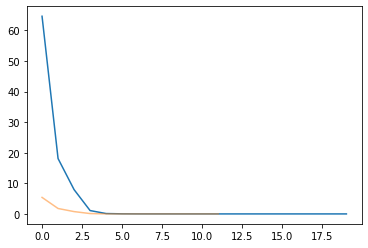

AMT_INCOME_TOTAL


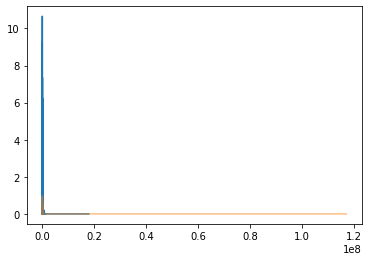

AMT_CREDIT


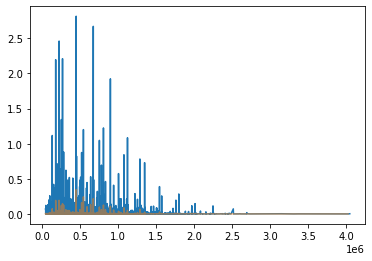

REGION_POPULATION_RELATIVE


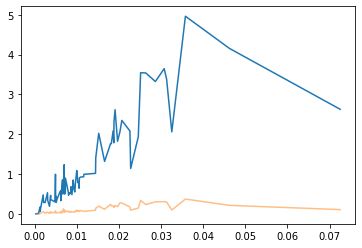

DAYS_BIRTH


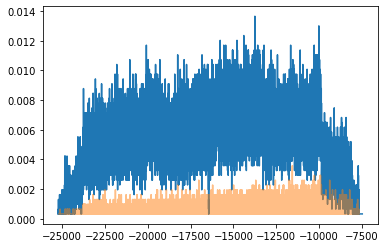

DAYS_EMPLOYED


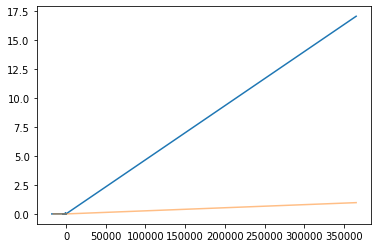

DAYS_REGISTRATION


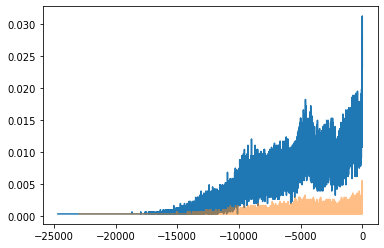

DAYS_ID_PUBLISH


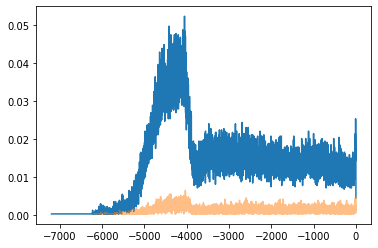

EXT_SOURCE_1


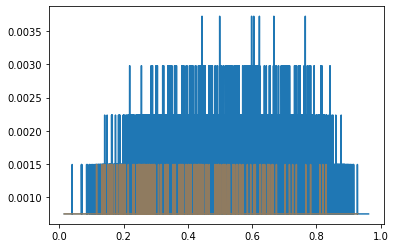

EXT_SOURCE_2


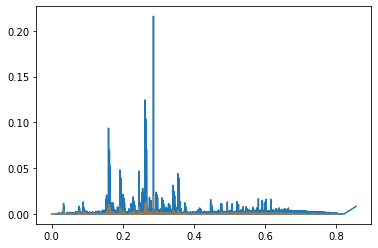

EXT_SOURCE_3


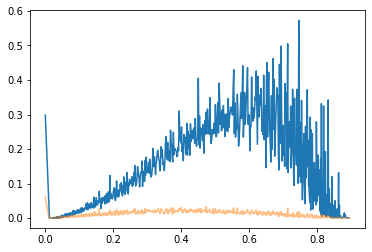

BASEMENTAREA_AVG


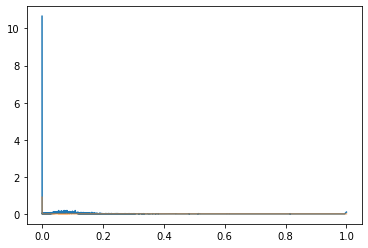

YEARS_BEGINEXPLUATATION_AVG


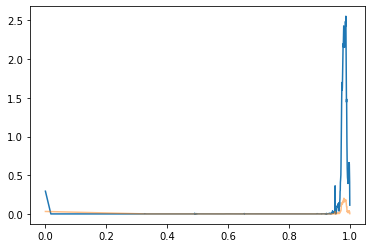

LANDAREA_AVG


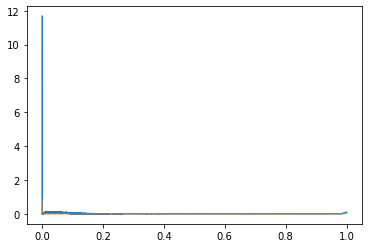

NONLIVINGAREA_AVG


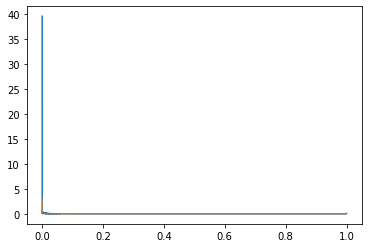

TOTALAREA_MODE


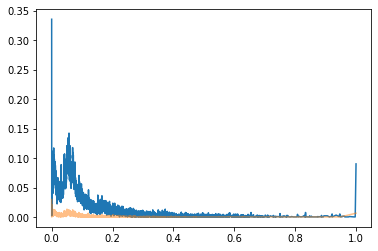

OBS_30_CNT_SOCIAL_CIRCLE


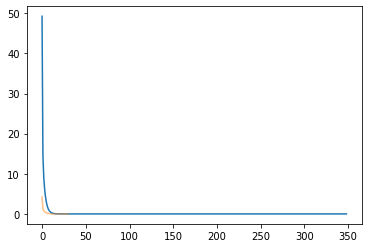

DEF_30_CNT_SOCIAL_CIRCLE


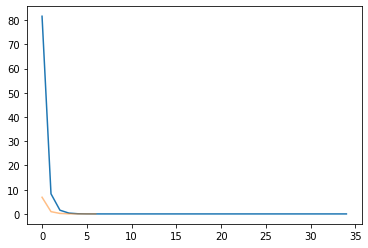

AMT_REQ_CREDIT_BUREAU_HOUR


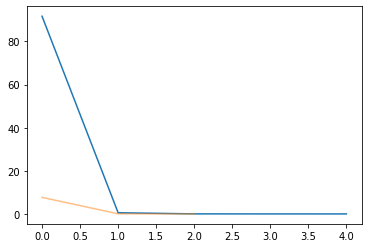

AMT_REQ_CREDIT_BUREAU_DAY


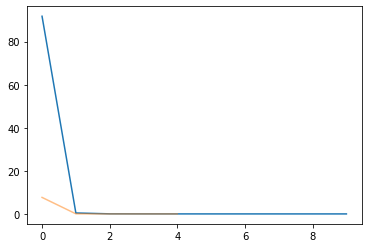

AMT_REQ_CREDIT_BUREAU_WEEK


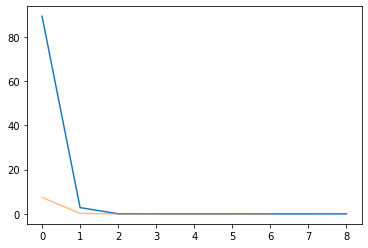

AMT_REQ_CREDIT_BUREAU_MON


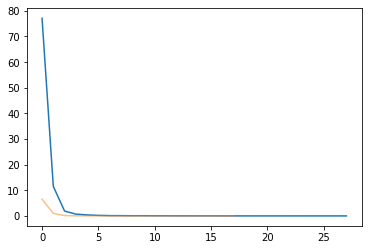

AMT_REQ_CREDIT_BUREAU_QRT


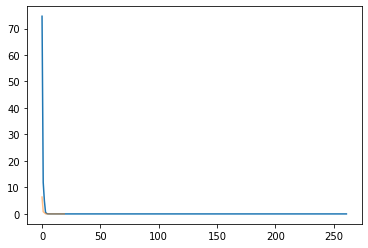

AMT_REQ_CREDIT_BUREAU_YEAR


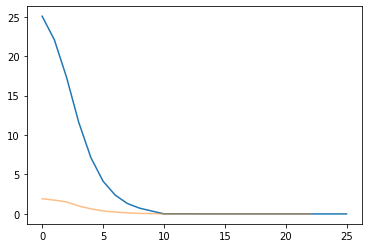

In [103]:
for head in m_heads:
    print(head)
    
#     p = (payback[head].value_counts() - payback[head].value_counts().mean()) / payback[head].value_counts().std()
#     p = p.sort_index()
#     d = (default[head].value_counts() - default[head].value_counts().mean()) / default[head].value_counts().std()
#     d = d.sort_index()
    
    p = payback[head].value_counts() / df[head].value_counts().sum() * 100
    p = p.sort_index()
    d = default[head].value_counts() / df[head].value_counts().sum() * 100
    d = d.sort_index()
    
#     p.hist()
#     d.hist()
    
    plt.plot(p.index, p)
    plt.plot(d.index, d, alpha=0.5)
    
    plt.show()

In [104]:
remove = ["BASEMENTAREA_AVG", "LANDAREA_AVG", "NONLIVINGAREA_AVG", "AMT_REQ_CREDIT_BUREAU_YEAR"]

In [105]:
m_heads = [head for head in m_heads if head not in remove]

In [106]:
m_heads

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [107]:
m_heads

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT']

### Datenüberprüfung

des:  9    Number of children the client has
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  1.0
Q[1]:  19.0


mean:  0.4170517477423572
var:  0.5214592938621124
std:  0.7221213844376252


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

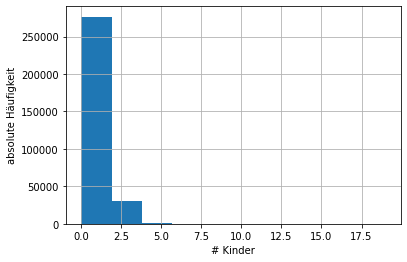

In [108]:
head = "CNT_CHILDREN"

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", df[head].quantile(q=0))
print("Q[0.25]: ", df[head].quantile(q=0.25))
print("Q[0.5]: ", df[head].quantile(q=0.5))
print("Q[0.75]: ", df[head].quantile(q=0.75))
print("Q[1]: ", df[head].quantile(q=1))
print("\n")
print("mean: ", df[head].mean())
print("var: ", df[head].var())
print("std: ", df[head].std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))


df[head].hist()
plt.xlabel("# Kinder")
plt.ylabel("absolute Häufigkeit")

des:  10    Income of the client
Name: Description, dtype: object


Q[0]:  25650.0
Q[0.25]:  112500.0
Q[0.5]:  147150.0
Q[0.75]:  202500.0
Q[1]:  117000000.0


mean:  168797.9192969845
var:  56227386501.18386
std:  237123.14627885626


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

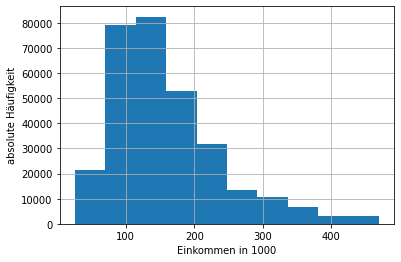

In [109]:
head = "AMT_INCOME_TOTAL"

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", df[head].quantile(q=0))
print("Q[0.25]: ", df[head].quantile(q=0.25))
print("Q[0.5]: ", df[head].quantile(q=0.5))
print("Q[0.75]: ", df[head].quantile(q=0.75))
print("Q[1]: ", df[head].quantile(q=1))
print("\n")
print("mean: ", df[head].mean())
print("var: ", df[head].var())
print("std: ", df[head].std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d = df[head].copy()
d /= 1000
d[d < d.quantile(q=0.99)].hist()
plt.xlabel("Einkommen in 1000")
plt.ylabel("absolute Häufigkeit")

des:  11    Credit amount of the loan
Name: Description, dtype: object


Q[0]:  45000.0
Q[0.25]:  270000.0
Q[0.5]:  513531.0
Q[0.75]:  808650.0
Q[1]:  4050000.0


mean:  599025.9997057016
var:  161998825566.727
std:  402490.77699585486


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

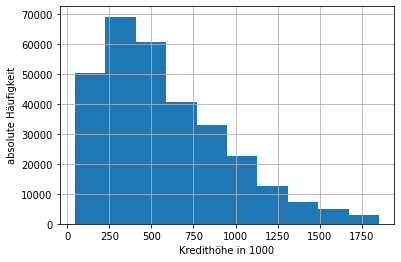

In [110]:
head = "AMT_CREDIT"

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", df[head].quantile(q=0))
print("Q[0.25]: ", df[head].quantile(q=0.25))
print("Q[0.5]: ", df[head].quantile(q=0.5))
print("Q[0.75]: ", df[head].quantile(q=0.75))
print("Q[1]: ", df[head].quantile(q=1))
print("\n")
print("mean: ", df[head].mean())
print("var: ", df[head].var())
print("std: ", df[head].std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d = df[head].copy()
d /= 1000
d[d < d.quantile(q=0.99)].hist()
plt.xlabel("Kredithöhe in 1000")
plt.ylabel("absolute Häufigkeit")

des:  19    Normalized population of region where client lives (higher number means the client lives in more populated region)
Name: Description, dtype: object


Q[0]:  0.00029
Q[0.25]:  0.010006
Q[0.5]:  0.01885
Q[0.75]:  0.028663
Q[1]:  0.072508


mean:  0.020868112057780042
var:  0.00019130430983272615
std:  0.0138312801227047


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

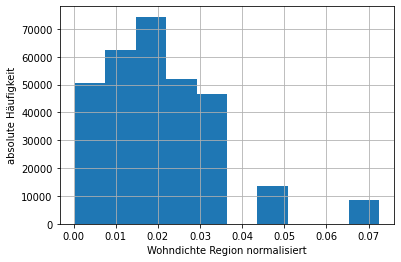

In [111]:
head = "REGION_POPULATION_RELATIVE"

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", df[head].quantile(q=0))
print("Q[0.25]: ", df[head].quantile(q=0.25))
print("Q[0.5]: ", df[head].quantile(q=0.5))
print("Q[0.75]: ", df[head].quantile(q=0.75))
print("Q[1]: ", df[head].quantile(q=1))
print("\n")
print("mean: ", df[head].mean())
print("var: ", df[head].var())
print("std: ", df[head].std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d = df[head].copy()
d.hist()
plt.xlabel("Wohndichte Region normalisiert")
plt.ylabel("absolute Häufigkeit")

des:  20    Client's age in days at the time of application
Name: Description, dtype: object


Q[0]:  20.517808219178082
Q[0.25]:  34.00821917808219
Q[0.5]:  43.15068493150685
Q[0.75]:  53.92328767123288
Q[1]:  69.12054794520547


mean:  43.93697278587162
var:  142.9491219992764
std:  11.956133237768656


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

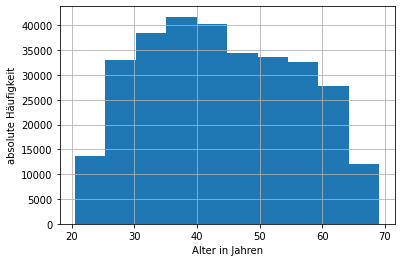

In [112]:
head = "DAYS_BIRTH"

d = df[head].copy()
d /= -365

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("Alter in Jahren")
plt.ylabel("absolute Häufigkeit")

des:  21    How many days before the application the person started current employment
Name: Description, dtype: object


Q[0]:  -1000.6657534246575
Q[0.25]:  0.7917808219178082
Q[0.5]:  3.3232876712328765
Q[0.75]:  7.561643835616438
Q[1]:  49.07397260273972


mean:  -174.83574220287383
var:  149813.03963560835
std:  387.05689457185537


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

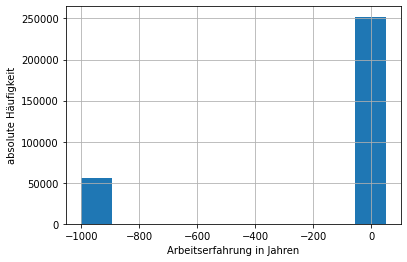

In [113]:
head = "DAYS_EMPLOYED"

d = df[head].copy()
d /= -365

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("Arbeitserfahrung in Jahren")
plt.ylabel("absolute Häufigkeit")

In [114]:
app_train.head()
app_train["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [115]:
t = app_train[[head, "NAME_INCOME_TYPE"]].copy()
t.loc[:,head] /= 365
t = t[t[head] > 100]
t["NAME_INCOME_TYPE"].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [116]:
pens = t[t["NAME_INCOME_TYPE"] == "Pensioner"]
unemp = t[t["NAME_INCOME_TYPE"] == "Unemployed"]

In [117]:
df.iloc[unemp.index, df.columns.get_loc(head)] = 0
df.iloc[pens.index, df.columns.get_loc(head)] = -66 * 365

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [118]:
df[head].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

## TODO: Arbeitsalter +1000 Jahre ist nicht möglich

des:  22    How many days before the application did client change his registration
Name: Description, dtype: object


Q[0]:  -0.0
Q[0.25]:  5.506849315068493
Q[0.5]:  12.33972602739726
Q[0.75]:  20.491780821917807
Q[1]:  67.59452054794521


mean:  13.66060363709156
var:  93.15614959976526
std:  9.651743345104306


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

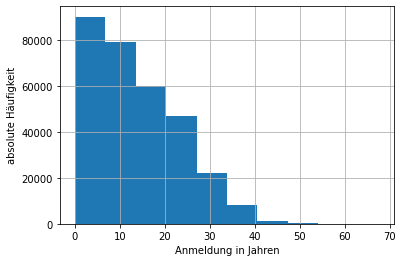

In [119]:
head = "DAYS_REGISTRATION"

d = df[head].copy()
d /= -365

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("Anmeldung in Jahren")
plt.ylabel("absolute Häufigkeit")

des:  23    How many days before the application did client change the identity document with which he applied for the loan
Name: Description, dtype: object


Q[0]:  -0.0
Q[0.25]:  4.712328767123288
Q[0.5]:  8.915068493150685
Q[0.75]:  11.778082191780822
Q[1]:  19.71780821917808


mean:  8.203294173283387
var:  17.102199793044868
std:  4.135480600008283


nan:  0.0


Text(0, 0.5, 'absolute Häufigkeit')

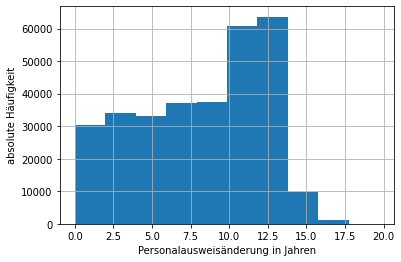

In [120]:
head = "DAYS_ID_PUBLISH"

d = df[head].copy()
d /= -365

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("Personalausweisänderung in Jahren")
plt.ylabel("absolute Häufigkeit")

des:  44    Normalized score from external data source
Name: Description, dtype: object


Q[0]:  0.014568132412445587
Q[0.25]:  0.33400728867409263
Q[0.5]:  0.5059979305057544
Q[0.75]:  0.6750525982300696
Q[1]:  0.962692770561306


mean:  0.5021298056566625
var:  0.04454727306856842
std:  0.21106224927392492


nan:  0.5638107254699832


Text(0, 0.5, 'absolute Häufigkeit')

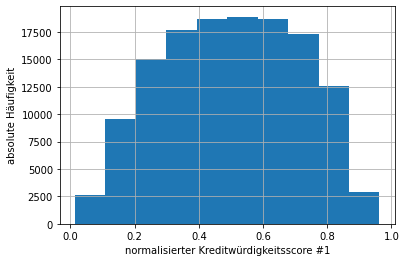

In [121]:
head = "EXT_SOURCE_1"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("normalisierter Kreditwürdigkeitsscore #1")
plt.ylabel("absolute Häufigkeit")

In [122]:
df.loc[df[head].isna(), head] = df[head].mean()

# TODO Fill Mean

des:  45    Normalized score from external data source
Name: Description, dtype: object


Q[0]:  8.173616518884397e-08
Q[0.25]:  0.3924574161782719
Q[0.5]:  0.5659614260608526
Q[0.75]:  0.6636170897493769
Q[1]:  0.8549996664047012


mean:  0.5143926741308462
var:  0.03650398282286796
std:  0.1910601549849365


nan:  0.0021462646864665006


Text(0, 0.5, 'absolute Häufigkeit')

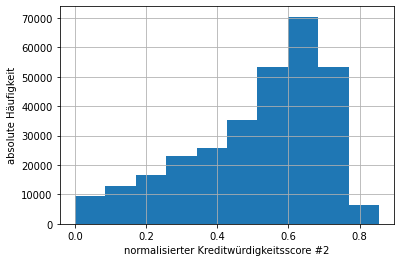

In [123]:
head = "EXT_SOURCE_2"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("normalisierter Kreditwürdigkeitsscore #2")
plt.ylabel("absolute Häufigkeit")

In [124]:
df.loc[df[head].isna(), head] = df[head].mean()

# TODO Fill Mean

des:  46    Normalized score from external data source
Name: Description, dtype: object


Q[0]:  0.0005272652387098817
Q[0.25]:  0.3706496323299817
Q[0.5]:  0.5352762504724826
Q[0.75]:  0.6690566947824041
Q[1]:  0.8960095494948396


mean:  0.5108529061799658
var:  0.037964326363282196
std:  0.19484436446374884


nan:  0.19825307062186392


Text(0, 0.5, 'absolute Häufigkeit')

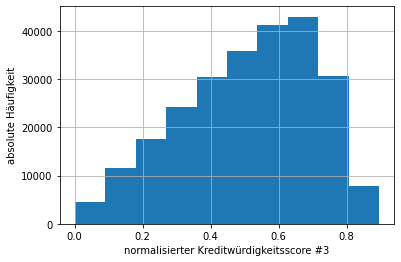

In [125]:
head = "EXT_SOURCE_3"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("normalisierter Kreditwürdigkeitsscore #3")
plt.ylabel("absolute Häufigkeit")

In [126]:
df.loc[df[head].isna(), head] = df[head].mean()

des:  49    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.9767
Q[0.5]:  0.9816
Q[0.75]:  0.9866
Q[1]:  1.0


mean:  0.9777348581623325
var:  0.0035074009635894642
std:  0.059223314358362825


nan:  0.48781019215572774


Text(0, 0.5, 'absolute Häufigkeit')

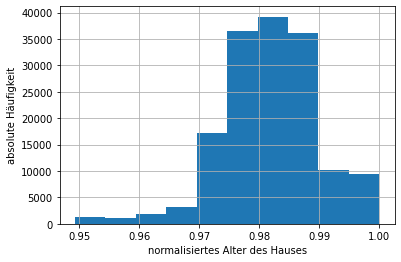

In [127]:
head = "YEARS_BEGINEXPLUATATION_AVG"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d[d > d.quantile(q=0.01)].hist()
plt.xlabel("normalisiertes Alter des Hauses")
plt.ylabel("absolute Häufigkeit")

In [128]:
df.loc[df[head].isna(), head] = df[head].mean()

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# TODO Fill Mean

des:  91    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0412
Q[0.5]:  0.0688
Q[0.75]:  0.1276
Q[1]:  1.0


mean:  0.10254666268544127
var:  0.011548151111637737
std:  0.10746232414961877


nan:  0.4826851722377411


Text(0, 0.5, 'absolute Häufigkeit')

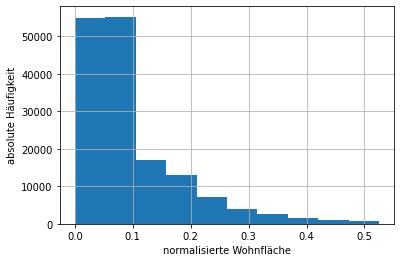

In [129]:
head = "TOTALAREA_MODE"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d[d < d.quantile(q=0.99)].hist()
plt.xlabel("normalisierte Wohnfläche")
plt.ylabel("absolute Häufigkeit")

In [130]:
df.loc[df[head].isna(), head] = df[head].mean()

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# TODO Fill Mean

des:  94    How many observation of client's social surroundings with observable 30 DPD (days past due) default
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  2.0
Q[1]:  348.0


mean:  1.4222454239942575
var:  5.764746958942107
std:  2.4009887461090083


nan:  0.0033202064316398437


Text(0, 0.5, 'absolute Häufigkeit')

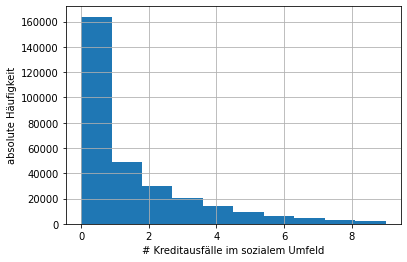

In [131]:
head = "OBS_30_CNT_SOCIAL_CIRCLE"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d[d < d.quantile(q=0.99)].hist()
plt.xlabel("# Kreditausfälle im sozialem Umfeld")
plt.ylabel("absolute Häufigkeit")

In [132]:
df.loc[df[head].isna(), head] = 0

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# TODO Fill Zero

des:  95    How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  0.0
Q[1]:  34.0


mean:  0.1434206662533851
var:  0.1995394868119246
std:  0.4466984293815287


nan:  0.0033202064316398437


Text(0, 0.5, 'absolute Häufigkeit')

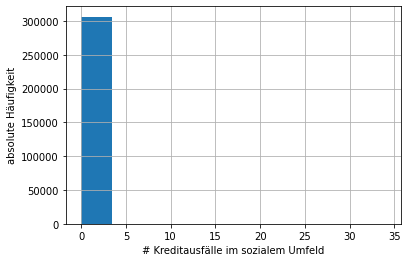

In [133]:
head = "DEF_30_CNT_SOCIAL_CIRCLE"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("# Kreditausfälle im sozialem Umfeld")
plt.ylabel("absolute Häufigkeit")

In [134]:
df.loc[df[head].isna(), head] = 0

# Fill Zero

des:  119    Number of enquiries to Credit Bureau about the client one hour before application
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  0.0
Q[1]:  4.0


mean:  0.006402448193930645
var:  0.007030676341401538
std:  0.08384912844747724


nan:  0.13501630835970097


Text(0, 0.5, 'absolute Häufigkeit')

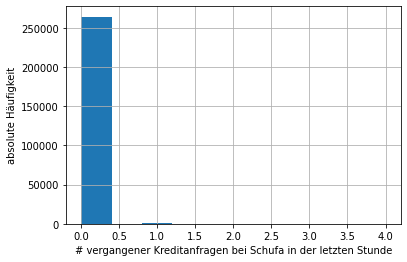

In [135]:
head = "AMT_REQ_CREDIT_BUREAU_HOUR"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("# vergangener Kreditanfragen bei Schufa in der letzten Stunde")
plt.ylabel("absolute Häufigkeit")

In [136]:
df.loc[df[head].isna(), head] = 0

# Fill Zero

des:  120    Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  0.0
Q[1]:  9.0


mean:  0.0070002105326475985
var:  0.012267203055698162
std:  0.1107574063243545


nan:  0.13501630835970097


Text(0, 0.5, 'absolute Häufigkeit')

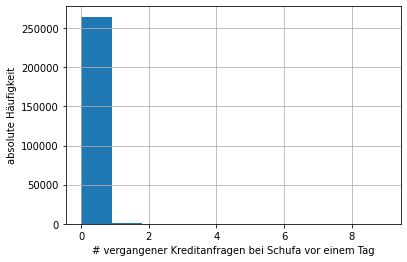

In [137]:
head = "AMT_REQ_CREDIT_BUREAU_DAY"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("# vergangener Kreditanfragen bei Schufa vor einem Tag")
plt.ylabel("absolute Häufigkeit")

In [138]:
df.loc[df[head].isna(), head] = 0

des:  121    Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  0.0
Q[1]:  8.0


mean:  0.0343619356973142
var:  0.04189589838651137
std:  0.20468487581282446


nan:  0.13501630835970097


Text(0, 0.5, 'absolute Häufigkeit')

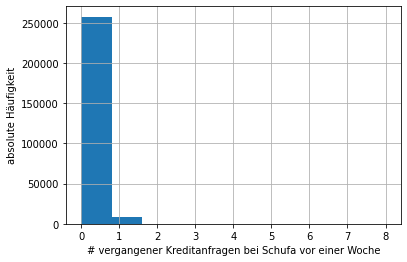

In [139]:
head = "AMT_REQ_CREDIT_BUREAU_WEEK"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("# vergangener Kreditanfragen bei Schufa vor einer Woche")
plt.ylabel("absolute Häufigkeit")

In [140]:
df.loc[df[head].isna(), head] = 0

des:  122    Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  0.0
Q[1]:  27.0


mean:  0.26739526000781977
var:  0.8390603897573367
std:  0.9160023961526175


nan:  0.13501630835970097


Text(0, 0.5, 'absolute Häufigkeit')

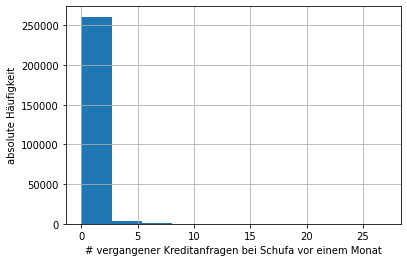

In [141]:
head = "AMT_REQ_CREDIT_BUREAU_MON"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("# vergangener Kreditanfragen bei Schufa vor einem Monat")
plt.ylabel("absolute Häufigkeit")

In [142]:
df.loc[df[head].isna(), head] = 0

des:  123    Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
Name: Description, dtype: object


Q[0]:  0.0
Q[0.25]:  0.0
Q[0.5]:  0.0
Q[0.75]:  0.0
Q[1]:  261.0


mean:  0.26547414959848414
var:  0.630524372630099
std:  0.7940556483207578


nan:  0.13501630835970097


Text(0, 0.5, 'absolute Häufigkeit')

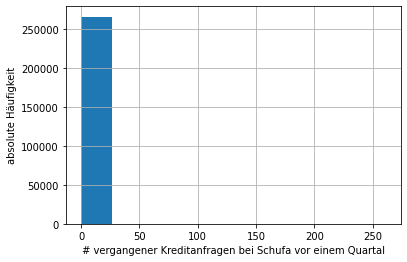

In [143]:
head = "AMT_REQ_CREDIT_BUREAU_QRT"

d = df[head].copy()

print("des: ", des[des["Row"] == head]["Description"])
print("\n")
print("Q[0]: ", d.quantile(q=0))
print("Q[0.25]: ", d.quantile(q=0.25))
print("Q[0.5]: ", d.quantile(q=0.5))
print("Q[0.75]: ", d.quantile(q=0.75))
print("Q[1]: ", d.quantile(q=1))
print("\n")
print("mean: ", d.mean())
print("var: ", d.var())
print("std: ", d.std())
print("\n")
print("nan: ", df[head].isna().sum()/len(df[head]))

plt.ticklabel_format(style = 'plain')
d.hist()
plt.xlabel("# vergangener Kreditanfragen bei Schufa vor einem Quartal")
plt.ylabel("absolute Häufigkeit")

In [144]:
df.loc[df[head].isna(), head] = 0

# Ergänzung wichtigste kats

In [145]:
cats = ["ORGANIZATION_TYPE","CODE_GENDER","NAME_EDUCATION_TYPE","REG_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_3","NAME_INCOME_TYPE","FLAG_EMP_PHONE","OCCUPATION_TYPE","REGION_RATING_CLIENT_W_CITY","NAME_INCOME_TYPE","REGION_RATING_CLIENT"]

In [146]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [147]:
for head in n_heads:
    app_train[head], _ = pd.factorize(app_train[head])

In [148]:
app_train[cats].head()

,ORGANIZATION_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,NAME_INCOME_TYPE,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,NAME_INCOME_TYPE,REGION_RATING_CLIENT
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,1,1,1,1
2,2,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,3,0,0,1,1,0,0,1,0,0,0


In [149]:
df = df.join(app_train[cats])
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORGANIZATION_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,NAME_INCOME_TYPE,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,NAME_INCOME_TYPE,REGION_RATING_CLIENT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.972200,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.014900,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,11,0.311267,0.622246,0.510853,0.0959,0.0529,0.985100,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.071400,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,1,0,1,1,1,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,9,0.502130,0.555912,0.729567,NaN,NaN,0.977735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102547,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,1,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,2.0,17,0.502130,0.650442,0.510853,NaN,NaN,0.977735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102547,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,11,0.502130,0.322738,0.510853,NaN,NaN,0.977735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102547,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,1,1,0,0,1,0,0,0


In [150]:
df[m_heads].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,0.083037,0.262949,0.139376,0.972200,0.014900,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,0.311267,0.622246,0.510853,0.985100,0.071400,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.502130,0.555912,0.729567,0.977735,0.102547,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,0.502130,0.650442,0.510853,0.977735,0.102547,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.502130,0.322738,0.510853,0.977735,0.102547,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
for head in m_heads:
    print(df[head].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [152]:
df = df[["SK_ID_CURR", "TARGET"]+m_heads]

In [154]:
df = df.set_index("SK_ID_CURR")

In [155]:
df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,0.083037,0.262949,0.139376,0.972200,0.014900,2.0,2.0,0.0,0.0,0.0,0.0,0.0
100003,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,0.311267,0.622246,0.510853,0.985100,0.071400,1.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.502130,0.555912,0.729567,0.977735,0.102547,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,0.502130,0.650442,0.510853,0.977735,0.102547,2.0,0.0,0.0,0.0,0.0,0.0,0.0
100007,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.502130,0.322738,0.510853,0.977735,0.102547,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df.to_csv(DATASET_DIR / "Datenaufbereitung" / "app_train_mets.csv")

In [157]:
len(df[m_heads])

307511